## Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 

The libraries above will be imported to so the the required dataset is loaded.  

In [2]:
main_df = pd.read_csv('train.csv')
final_df = pd.read_csv('test.csv')

The above datasets are required for this task.

In [3]:
main_df.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S  
15      0            248706  16.0000   NaN        S  
16      1            382652  29.1250   NaN        Q  
17      0            244373  13.0000   NaN        S  
18      0            345763  18.0000   NaN        S  
19      0              2649   7.2250   NaN        C

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 12 features in the above dataset such as the PassengerID, survived and the Name. There are 891 rows that include all the data for each individual such as, the name, ticket number and how many survived on the titanic. There are also three different data types including the two different floats being the Age and the Fare, that are features. In addition to the different data types there are five integers and five objects.       

In [5]:
main_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Here the ranges of the individual values are displayed including the key statistics for each individual feature. For example, the minimum and maximum amount of kids or parents allowed on the boat are six and siblings being eight allowed with the mean being low meaning that most of the people on board were travelling alone. There are also some missing values such as, the Age feature.  

In [6]:
final_df.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

Firstly most of the features above will need to be changed into quantitative ones before they are then processed by the 'machine learning' algorithms. 

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


After checking for missing values it has been identified that the Age is missing for some people, the Cabin is also another feature that is missing but may be dropped later on anyway, and the Fare is also missing. As a result of this the Age values will need to be filled.    

In [8]:
final_df.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

## Data Analysis

In [9]:
age_bins = np.arange(0,90,20)
age_bins

array([ 0, 20, 40, 60, 80])

In [10]:
df_age = pd.DataFrame()
df_age['Survived'] = main_df['Survived']
df_age['Age'] = main_df['Age']
df_age['Sex'] = main_df['Sex']
df_age['AgeGroup'] = pd.cut(main_df['Age'], bins=age_bins)

df_male = df_age[df_age['Sex']=='male']
df_male =df_male.rename(columns={'AgeGroup': 'Male Age'})

df_female = df_age[df_age['Sex']=='female']
df_female = df_female.rename(columns={'AgeGroup': 'Female Age'})

A histogram will be constructed to identify the survival of particular values.

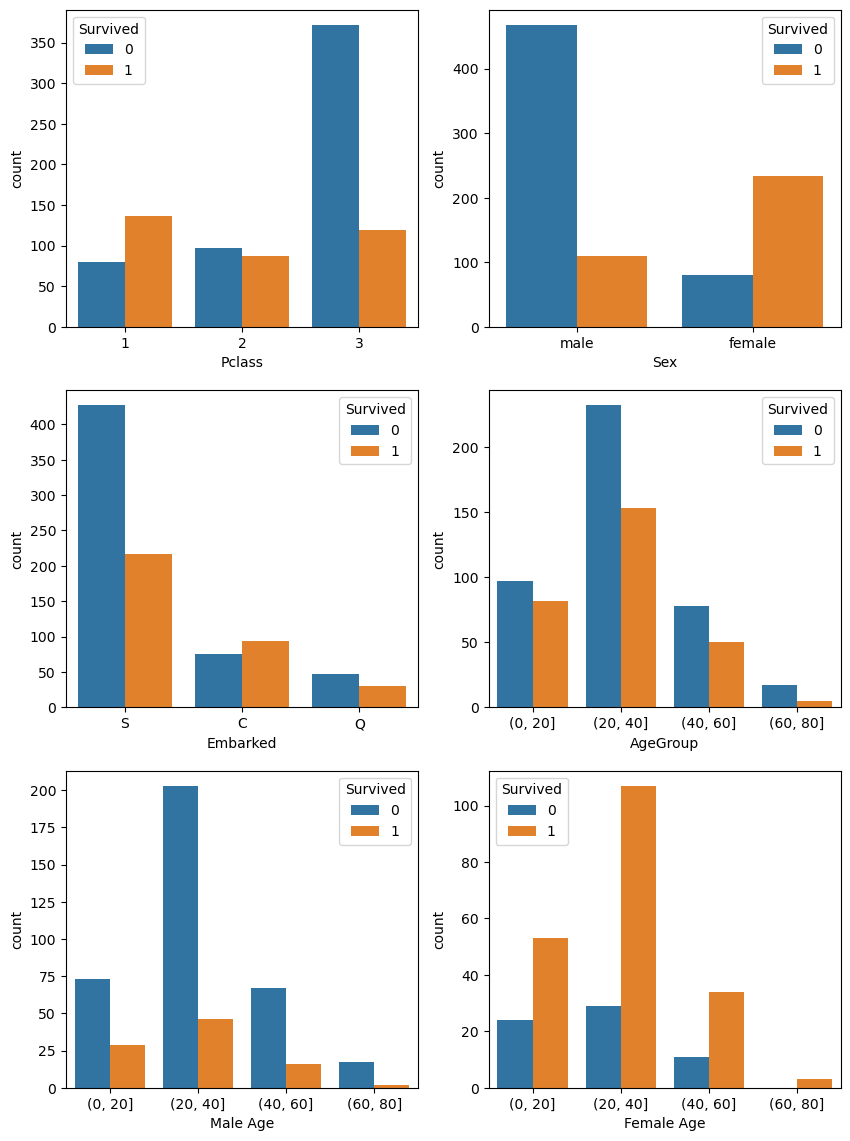

In [11]:
fig=plt.figure(figsize=[10,14])

fig.add_subplot(3,2,1)
sns.countplot(x='Pclass',hue='Survived',data=main_df)

fig.add_subplot(3,2,2)
sns.countplot(x='Sex',hue='Survived',data=main_df)

fig.add_subplot(3,2,3)
sns.countplot(x='Embarked',hue='Survived',data=main_df)

fig.add_subplot(3,2,4)
sns.countplot(x='AgeGroup',hue='Survived',data=df_age)

fig.add_subplot(3,2,5)
sns.countplot(x='Male Age',hue='Survived',data=df_male)

fig.add_subplot(3,2,6)
sns.countplot(x='Female Age',hue='Survived',data=df_female)

# # Also a good idea to visualize the Age correlation:
# g = sns.FacetGrid(main_df, col='Survived')
# g.map(plt.hist, 'Age', bins=20)

plt.show()

The following count plot above displays the different values for Sex, Age, the AgeGroup, Embarked and Pclass. 

The survival and not survival on Male Age and Female Age depicts that the women have a higher chance of surviving more than men. In consideration to the highest chance or survival, the age ranges between 30 to 40 years old are more likely to survive. The highest chance of survival for males is also 30 to 40 years old. 

When considering the lowest rate of survival in age, for males it was from 70 to 80. For females the lowest rate of survival was also 70 to 80 years old.

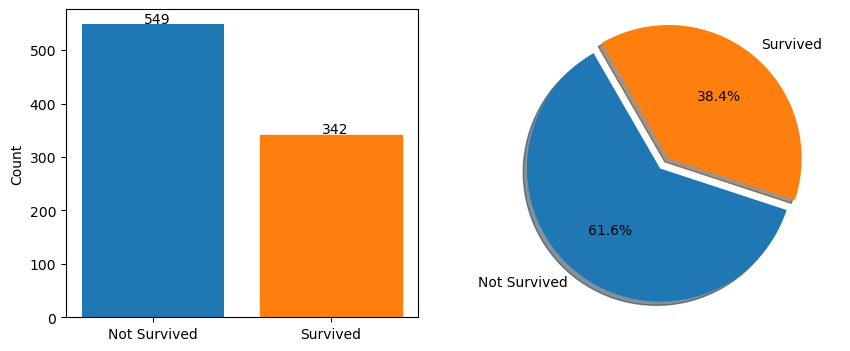

In [12]:
labels = ['Not Survived','Survived']
explode = (0, 0.1)
survivors_data = [main_df[main_df['Survived']==0].count()[0],main_df[main_df['Survived']==1].count()[0]]

fig = plt.figure(figsize=[10,4])

ax1 = fig.add_subplot(1,2,1)
barplot = plt.bar(labels,
                  survivors_data,
                  align='center')
barplot[1].set_color('C1')
plt.ylabel('Count')

for i, v in enumerate(survivors_data): #display numbers above bars
    ax1.text(i-0.05, v+2, str(v))

ax2 = fig.add_subplot(1,2,2)
ax2.pie(survivors_data,
        labels=labels,
        explode = explode,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=120)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show() 

The following count plots represents shows that 342 individuals survived and 549 didnt survive.  

### Dealing with Missing and Categorical values

In [13]:
both_df = pd.concat([main_df, final_df], sort=True)
both_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


The cabin feature here is also missing majority of the values. 

##### Missing values on features: Age, Cabin, Embarked and Fare.

In [14]:
male_age_mean = round(both_df[both_df['Sex']=='male']['Age'].mean())
female_age_mean = round(both_df[both_df['Sex']=='female']['Age'].mean())
ages_mean = {'male':male_age_mean, 'female':female_age_mean}
ages_mean

{'male': 31, 'female': 29}

This represents finding the mean values from the female and male age feature in the column. 

In [15]:
title_names = {}

for name in both_df['Name']:
    title = name.split(',')[1].split('.')[0].strip(' ')
    if title in title_names:
        title_names[name.split(',')[1].split('.')[0].strip(' ')] += 1
    else:
        title_names[name.split(',')[1].split('.')[0].strip(' ')] = 1
        
title_names        

{'Mr': 757,
 'Mrs': 197,
 'Miss': 260,
 'Master': 61,
 'Don': 1,
 'Rev': 8,
 'Dr': 8,
 'Mme': 1,
 'Ms': 2,
 'Major': 2,
 'Lady': 1,
 'Sir': 1,
 'Mlle': 2,
 'Col': 4,
 'Capt': 1,
 'the Countess': 1,
 'Jonkheer': 1,
 'Dona': 1}

The title names value indicates the number of people on the boat that have the names. For example, 757 individuals have 'Mr' as their title name. 

In [16]:
counter = 1
names = {}
removal_list = []

for name in title_names:
    if title_names[name] > 100:
        names[name] = counter
        counter += 1
        removal_list.append(name)

names['*Rare*'] = 0 # '*' to avoid an unintended match
names    

{'Mr': 1, 'Mrs': 2, 'Miss': 3, '*Rare*': 0}

In [17]:
fare_by_class = {}

for pclass in [1,2,3]:
    fare_by_class[pclass] = both_df[both_df['Pclass']==pclass]['Fare'].mean()
    
fare_by_class    

{1: 87.5089916408668, 2: 21.1791963898917, 3: 13.302888700564969}

this displays the fare by class, where the mean is found.

In [18]:
cabins_number = {}

for cabin in both_df['Cabin']:
    if pd.notna(cabin):
        if cabin[0] in cabins_number:
            cabins_number[cabin[0]] += 1
        else:
            cabins_number[cabin[0]] = 1
        
cabins_number

{'C': 94, 'E': 41, 'G': 5, 'D': 46, 'A': 22, 'B': 65, 'F': 21, 'T': 1}

In [19]:
cabins = {}

for n, letter in enumerate(list(cabins_number)):
    cabins[letter] = n
    
cabins    

{'C': 0, 'E': 1, 'G': 2, 'D': 3, 'A': 4, 'B': 5, 'F': 6, 'T': 7}

In [20]:
cabins_list = []
cabins_by_class = {}

for pclass in [1,2,3]:
    for cabin in both_df[both_df['Pclass']==pclass]['Cabin']:
        if pd.notna(cabin):
            cabins_list.append(cabin[0])
    most_common = Counter(cabins_list).most_common(1)
    cabins_by_class[pclass]=most_common
    cabins_list = []
    
cabins_by_class #use indexes [0][0] to acess the cabin letter, i.e. 'cabins_by_class[1][0][0]' for First Class

{1: [('C', 94)], 2: [('F', 13)], 3: [('F', 8)]}

In [21]:
genders = {'male':0, 'female':1}
ports = {'C':0, 'Q':1, 'S':2}

In [22]:
def preprocess(df):
    
    df['Family'] = df['SibSp'] + df['Parch']
    
    for n,age in enumerate(df['Age']):
        if pd.isna(age):
            df.at[n,'Age'] = ages_mean[both_df.iloc[n]['Sex']]
            
    df['Sex'] = df['Sex'].map(genders)
    
    for n,cabin in enumerate(df['Cabin']):
        if pd.notna(cabin):
            df.at[n,'Cabin'] = cabins[cabin[0]]
        else:
            cabin_letter = cabins_by_class[df.iloc[n]['Pclass']][0][0] # Fill with the most common by 'Pclass'
            df.at[n,'Cabin'] = cabins[cabin_letter]
    
    df['Embarked'].fillna('S', inplace=True) # Fill with the most common
    df['Embarked'] = df['Embarked'].map(ports)
    
    for n,fare in enumerate(df['Fare']):
        if pd.isna(fare):
            df.at[n,'Fare'] = fare_by_class[df.iloc[n]['Pclass']]
    
    for n,name in enumerate(df['Name']):
        if name.split(',')[1].split('.')[0].strip(' ') in names:
            df.at[n,'Name'] = names[name.split(',')[1].split('.')[0].strip(' ')]
        else: # Just in case
            df.at[n,'Name'] = names['*Rare*']
    
    df = df.drop(['PassengerId','Ticket','SibSp','Parch'], axis=1)
    
    return df

In [23]:
main_df = preprocess(main_df)
main_df.head()

Survived  Pclass Name  Sex   Age     Fare Cabin  Embarked  Family
0         0       3    1    0  22.0   7.2500     6         2       1
1         1       1    2    1  38.0  71.2833     0         0       1
2         1       3    3    1  26.0   7.9250     6         2       0
3         1       1    2    1  35.0  53.1000     0         2       1
4         0       3    1    0  35.0   8.0500     6         2       0

In [24]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    object 
 7   Embarked  891 non-null    int64  
 8   Family    891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


This shows that there are no longer any missing values for the following features. Some features have also been dropped like the Ticket and PassengerID.

## Train/Test Split

In [25]:
X = main_df.drop(['Survived'], axis=1)
y = main_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
X_train.head()

Pclass Name  Sex   Age      Fare Cabin  Embarked  Family
825       3    1    0  31.0    6.9500     6         1       0
8         3    2    1  27.0   11.1333     6         2       2
689       1    3    1  15.0  211.3375     5         2       1
513       1    2    1  54.0   59.4000     0         0       1
729       3    3    1  25.0    7.9250     6         2       1

When implementing a train and test split we are splitting the data, where the training models training will be utilised and the model is tested using the tested set. 

In [26]:
y_train.head()

825    0
8      1
689    1
513    1
729    0
Name: Survived, dtype: int64

Using the 'head' function we are displaying the five rows of the data frame by default. This also indicates the entry number and whether they survived. For example, entry 689 has survived represented by '1'.  

## Balancing Data (Over-sampling)

In [27]:
len(X)

891

This balances the datasets, and creates unique data samples for the minority class to achieve a balanced dataset. 

In [28]:
y_train.mean()

0.3782771535580524

In [29]:
sm = SMOTE(random_state=101)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [30]:
y_train.mean()

0.5

In [31]:
len(X_train)

996

## Building Decision Tree

In [32]:
dt = DecisionTreeClassifier(random_state=101)

print('CV score:', cross_val_score(dt, X_train, y_train, cv = 3).mean())

CV score: 0.8002008032128515


the purpose of this is to create predictions. 

## Building Random Forest

In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=101)

print('CV score:', cross_val_score(rf, X_train, y_train, cv = 3).mean())

CV score: 0.8313253012048193


This will be combining the outputs of several decision trees to result in a single result. 

## Building SVM

In [34]:
svm = SVC(gamma='auto',random_state=101)

print('CV score:', cross_val_score(svm, X_train, y_train, cv = 3).mean())

CV score: 0.7740963855421686


## Building KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=1, leaf_size=1000, p=1)

print('CV score:', cross_val_score(knn, X_train, y_train, cv = 3).mean())

CV score: 0.7941767068273092


/Users/soniachauhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/soniachauhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

## Building Logistic Regression

In [36]:
lr = LogisticRegression(random_state=101, solver='lbfgs', max_iter=500) #Parameters added to disable warnings

print('CV score:', cross_val_score(lr, X_train, y_train, cv = 3).mean())

CV score: 0.7540160642570282


## Hyperparameters tuning (Random Forest)

In [37]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

The hyperparemeters allows finding a set of parameter values, and is applied. 

In [38]:
rf_grid = RandomForestClassifier(random_state=101) # creates a new estimator

# Create the parameter grid based on the results of random search 
param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 5, 10],
              'n_estimators': [100, 300, 500]}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=2)

In [39]:
# Fit the grid search to the data and show the best parameters
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'criterion': 'entropy',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [40]:
best_grid = grid_search.best_estimator_
best_grid # Note that it's a classifier

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       random_state=101)

In [41]:
print('CV score:', cross_val_score(best_grid, X_train, y_train, cv=3).mean())
print('RF Test Score:', best_grid.score(X_test, y_test))

CV score: 0.8413654618473897
RF Test Score: 0.7888888888888889


## Checking importances

In [42]:
best_grid.feature_importances_

array([0.09149175, 0.27324363, 0.12467609, 0.16779612, 0.18672581,
       0.05727032, 0.03137498, 0.06742129])

In [43]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(best_grid.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importance
feature             
Name           0.273
Fare           0.187
Age            0.168
Sex            0.125
Pclass         0.091
Family         0.067
Cabin          0.057
Embarked       0.031

The above code portrays how the importance is measured between all the features.

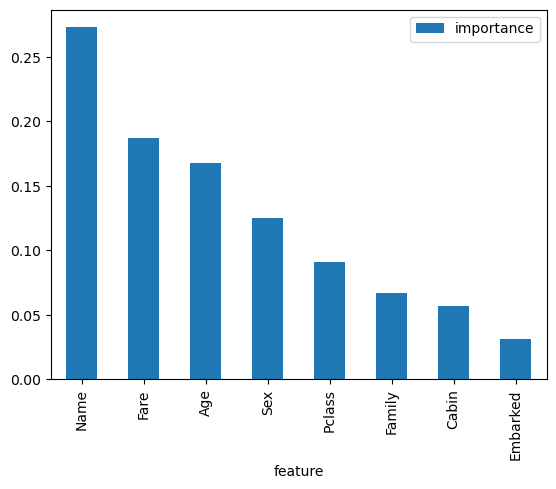

In [44]:
importances.plot.bar()
plt.show()

This displays the importance of each feature. 

## Final Prediction

In [45]:
submission_df = preprocess(final_df)
submission_df.head()

Pclass Name  Sex   Age     Fare Cabin  Embarked  Family
0       3    1    0  34.5   7.8292     6         1       0
1       3    2    1  47.0   7.0000     6         2       1
2       2    1    0  62.0   9.6875     6         1       0
3       3    1    0  27.0   8.6625     6         2       0
4       3    2    1  22.0  12.2875     6         2       2

In [46]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   Fare      418 non-null    float64
 5   Cabin     418 non-null    object 
 6   Embarked  418 non-null    int64  
 7   Family    418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


Now we can see that there are 418 entries and all the features have the same and none are missing. 

In [47]:
final_prediction = best_grid.predict(submission_df)
final_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

This represents the predicted values where 0 represents the people that didnt survive and 1 representing survived. 

In [48]:
final = pd.concat([final_df['PassengerId'],pd.DataFrame(final_prediction, columns=['Survived'])], axis=1)
final.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

This indicates who survived and who didnt. For example, passenger 892 has a '0' representeed in the survived colummn. This means that the passenger with the ID 892 did not survive.  

In [49]:
with open('submission.csv','w') as csv_file:
    csv_file.write('PassengerId,Survived\n')
    
    for _,row in final.iterrows():
        text = str(row['PassengerId'])+','+str(row['Survived'])
        csv_file.write(text+'\n')

[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=5, n_esti

[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=2, n_esti

[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, min_samples_leaf=3, min_samples_split=5, n_es